Импортируем все, что нам необходимо:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [2]:
diabetes = load_diabetes()                                           # загружаем наш датасет
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)   # загружаем датасет в двумерный массив, для удобного представления в таблицах
df['target'] = diabetes.target                                       # добавляем столбец target со значениями таргет (т.е. целевыми значениями)
df                                                                   # убедимся, что все сработало правильно, выведя наши данные

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Теперь построим графики зависимостей нашего таргета от каждого из столбцов для того, чтобы выбрать подходящий столбец для нашей линейной регрессии:

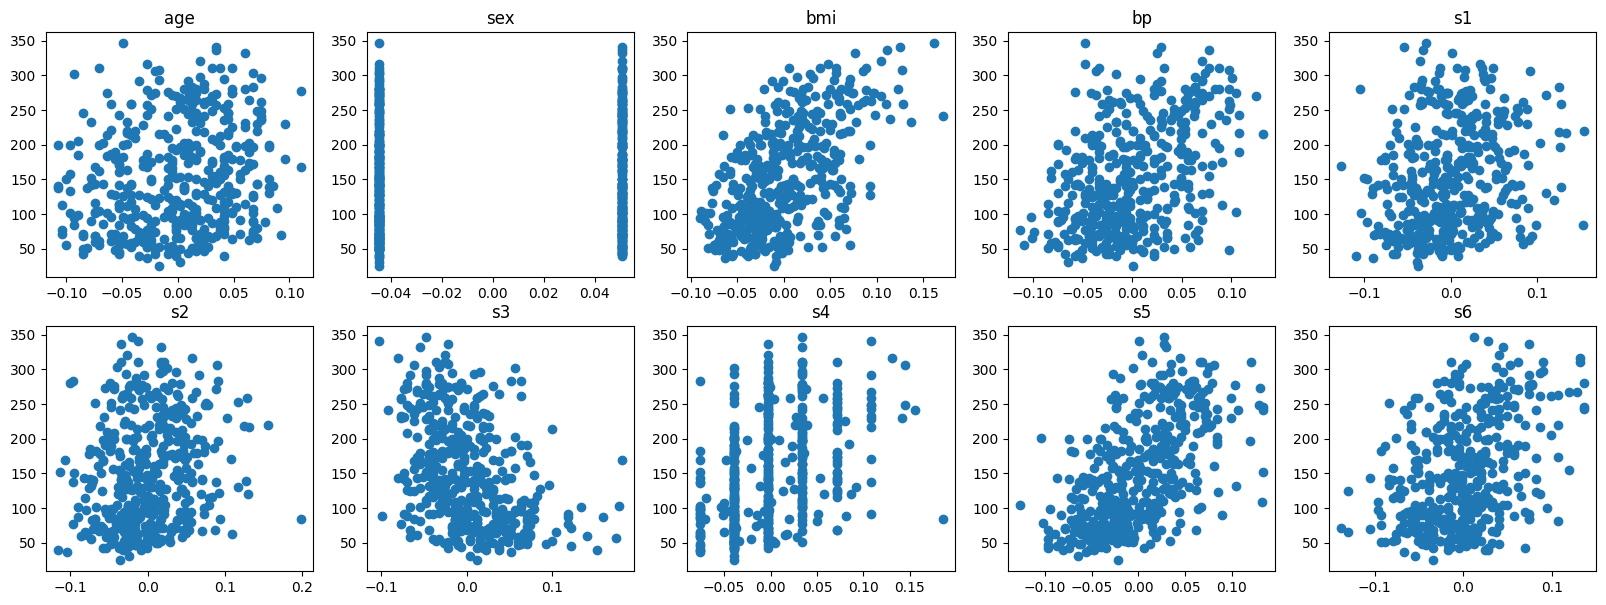

In [3]:
plt.figure(figsize=(20,7))                 # обозначаем размеры нашего графика
features = list(df.columns)                # выбираем все признаки из нашего датасета
features.pop()                             # т.к. мы добавляли признак target, то сейчас нам нужно его удалить
for i, name in enumerate(features):        # рисуем каждый из графиков по отдельности
	plt.subplot(2, 5, i + 1)               # разделяем наш графика на 2 строки, в каждой из которых по 5 графиков, и поочередно рисуем наши графики
	plt.scatter(df[name], df['target'])    # обозначаем значения для оси x и для оси y
	plt.title(name)                        # устанавливаем названия для графиков


Исходя из полученных изображений, можно заметить, что сильнее подстраиваются под таргет признаки: bmi и s5. Но т.к. нам нужен лишь один признак, то можно воспользоваться корреляцией Пирсона между признаком и таргетом, чтобы найти у какого признака корреляция с таргетом будет наибольшей:

In [4]:
correlations = [np.corrcoef(df[name], df['target'], rowvar=False)[0,1] for name in features]                         # считаем корреляцию Пирсона для каждого признака и таргета
best_feature = np.argmax(np.abs(correlations))                                                                       # выбираем признак с максимально посчитанной корреляцией
print("Признак с наибольшей корреляцией с таргетом: ", correlations[best_feature], features[best_feature])           # выводим значение корреляции и сам признак

Признак с наибольшей корреляцией с таргетом:  0.5864501344746885 bmi


Как видим наибольшую корреляцию имеет признак bmi. Тогда оставим его для нашей линейной регрессии:

In [5]:
x = df['bmi'].values.reshape(-1,1)   # выбираем значения bmi в качестве x
y = df['target'].values              # выбираем значения target в качестве y

Разделим полученные данные на тренировочную и тестовую выборки:

In [6]:
from sklearn.model_selection import train_test_split                                     # импортируем
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0) # размер выборки принимаем 30% от исходного

Теперь обучим линейную регрессию, которая встроена в sklearn:

In [7]:
from sklearn.linear_model import LinearRegression    # импортируем
sklearn_lr = LinearRegression()                      # "создаем" линейную регрессию
sklearn_lr.fit(x_train, y_train)                     # "обучаем" регрессию на тренировачной выборке
y_pred_sklearn = sklearn_lr.predict(x_test)          # просим ее предсказать значения для тестовой выборки

Теперь применим собственную линейную регрессию из лабораторной 1.1:

In [8]:
def linearRegression(xs, ys):  # функция для нахождения коэффициентов в линейной регрессии
	n = len(xs)
	w1 = (sum(xs) * sum(ys) / n - sum([xs[i] * ys[i] for i in range(n)])) / (sum(xs) ** 2 / n - sum([xs[i] ** 2 for i in range(n)]))
	w0 = sum(ys) / n - w1 * sum(xs) / n
	return w0, w1

Воспользуемся нашей линейной регрессией для того, чтобы предсказать значения:

In [9]:
w0, w1 = linearRegression(x_train.squeeze().tolist(), y_train.tolist())  # находим коэффициенты с помощью нашей собственной регрессии
y_pred_my = []                                                           #\
for x in x_test:                                                         # | предсказываем значения при помощи нашей регрессии
	y_pred_my.append(w0 + w1 * float(x))                                 #/

C:\Users\ALEX\AppData\Local\Temp\ipykernel_4600\4186289175.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_my.append(w0 + w1 * float(x))                                 #/


Выводим полученные коэффициенты линейных регрессий:

In [10]:
print('Коэффициенты регрессии от sklearn: ', sklearn_lr.intercept_, sklearn_lr.coef_)   # регрессия от sklearn
print('Коэффициенты регрессии от нас: ', w0, w1)                                        # наша регрессия

Коэффициенты регрессии от sklearn:  153.43509039227231 [1013.17358257]
Коэффициенты регрессии от нас:  153.43509039227231 1013.1735825689451


Видим, что коэффициенты совпадают, а значит наша линейная регрессия правильна. Остается только изобразить регрессионную прямую.

Text(0, 0.5, 'target')

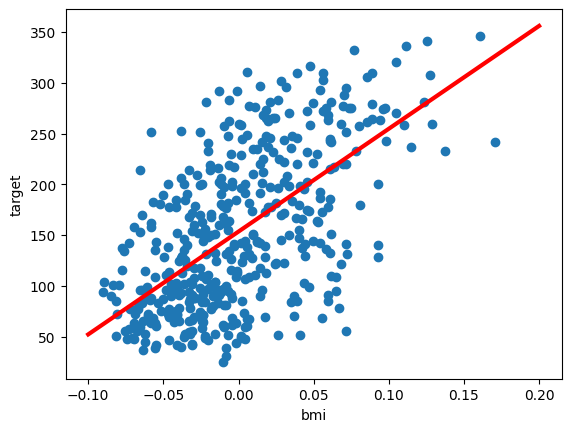

In [11]:
x = np.linspace(-0.1, 0.2, 100)                  #\
y = w0 + w1 * x                                  # \
plt.plot(x, y, c='red', linewidth=3)             # | изображаем регрессионную прямую, а также те данные, которые мы хотели предсказать
plt.scatter(df['bmi'], df['target'])             # |
plt.xlabel('bmi')                                # /
plt.ylabel('target')                             #/

Теперь выведем таблицу с результатами предсказаний:

In [12]:
result = pd.DataFrame({'Цель': y_test, 'Предсказанное sklearn-ом': y_pred_sklearn, 'Предсказанное нами': y_pred_my})
result

,Цель,Предсказанное sklearn-ом,Предсказанное нами
0,321.0,259.624486,259.624486
1,215.0,214.852046,214.852046
2,127.0,162.435532,162.435532
3,64.0,129.675210,129.675210
4,175.0,199.563896,199.563896
...,...,...,...
128,78.0,221.404111,221.404111
129,131.0,160.251510,160.251510
130,212.0,170.079607,170.079607
131,182.0,146.055371,146.055371
